In [1]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.preprocessing import StandardScaler
import warnings 

# Reading CSV Data

In [3]:
df1 = pd.read_csv('df1.csv' , index_col=0)


In [4]:
df1.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only,number_of_days
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5


In [5]:
df2 = pd.read_csv('df2.csv' , index_col=0)
df2.head()

,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,AK,0.0,0.0,0.0,0.0,0.0,2292.8,0.0
1,AL,6780.6,134.7,148.7,13894.8,26457.6,716.4,2377.1
2,AR,6651.0,4597.8,291.0,10216.5,706.4,0.0,1135.5
3,AZ,1486.5,1879.5,0.0,5358.0,0.0,1327.8,0.0
4,CA,16199.3,18798.3,15131.0,3445.4,0.0,98106.3,0.0


In [6]:
df3 = pd.read_csv('df3.csv' , index_col=0)
df3.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,1980,AK,0,0,0,0,0,0,0
1,1980,AL,1,0,0,0,0,0,0
2,1980,AR,1,1,0,0,0,0,0
3,1980,AZ,0,0,0,0,0,0,0
4,1980,CA,0,0,0,0,0,0,0


In [7]:
Inflation_rate_vs_total_cost = pd.read_csv('Inflation_rate_vs_total_cost.csv' , index_col=0)
Inflation_rate_vs_total_cost.head()

,year_only,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars)
0,1980,82383.333333,44434.8
1,1981,90933.333333,3392.1
2,1982,96533.333333,14765.9
3,1983,99583.333333,26005.6
4,1984,103933.333333,3124.5


# Creating Dummies

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 375
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Name                                           376 non-null    object 
 1   Disaster                                       376 non-null    object 
 2   Begin Date                                     376 non-null    object 
 3   End Date                                       376 non-null    object 
 4   Total CPI-Adjusted Cost (Millions of Dollars)  376 non-null    float64
 5   Deaths                                         376 non-null    int64  
 6   year_only                                      376 non-null    int64  
 7   number_of_days                                 376 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 26.4+ KB


In [9]:
dummy = pd.get_dummies(df1['Disaster'])
dummy.head()

,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [10]:
df1d = pd.concat([df1, dummy], axis=1)
df1d.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only,number_of_days,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7,0,1,0,0,0,0,0
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4,0,0,0,0,1,0,0
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182,1,0,0,0,0,0,0
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2,0,0,1,0,0,0,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5,0,0,0,1,0,0,0


In [11]:
df1d.corr()

,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only,number_of_days,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
Total CPI-Adjusted Cost (Millions of Dollars),1.000000,0.595083,0.006823,0.062359,0.072709,-0.053666,-0.026863,-0.258683,0.380812,-0.008441,-0.036810
Deaths,0.595083,1.000000,-0.079572,0.060037,0.152398,-0.048285,-0.019816,-0.158325,0.149504,-0.023725,0.025058
year_only,0.006823,-0.079572,1.000000,-0.024409,-0.113583,-0.068194,-0.181677,0.271660,-0.078007,-0.001454,-0.109087
number_of_days,0.062359,0.060037,-0.024409,1.000000,0.747294,-0.043173,-0.056401,-0.385071,-0.169737,0.398853,-0.090079
Drought,0.072709,0.152398,-0.113583,0.747294,1.000000,-0.109126,-0.046942,-0.296586,-0.133199,-0.074728,-0.074728
Flooding,-0.053666,-0.048285,-0.068194,-0.043173,-0.109126,1.000000,-0.057009,-0.360194,-0.161766,-0.090754,-0.090754
Freeze,-0.026863,-0.019816,-0.181677,-0.056401,-0.046942,-0.057009,1.000000,-0.154942,-0.069586,-0.039039,-0.039039
Severe Storm,-0.258683,-0.158325,0.271660,-0.385071,-0.296586,-0.360194,-0.154942,1.000000,-0.439654,-0.246655,-0.246655
Tropical Cyclone,0.380812,0.149504,-0.078007,-0.169737,-0.133199,-0.161766,-0.069586,-0.439654,1.000000,-0.110775,-0.110775
Wildfire,-0.008441,-0.023725,-0.001454,0.398853,-0.074728,-0.090754,-0.039039,-0.246655,-0.110775,1.000000,-0.062147


#  Regression Plots

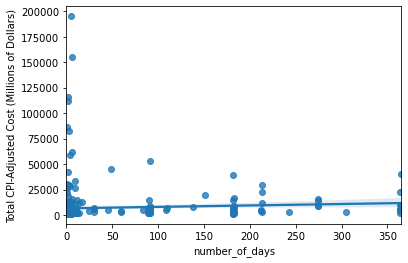

In [12]:
_ = sns.regplot(x='number_of_days', y='Total CPI-Adjusted Cost (Millions of Dollars)', data=df1d)

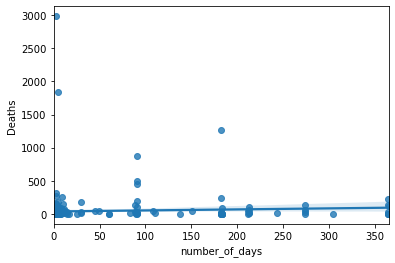

In [13]:
_ = sns.regplot(x='number_of_days', y='Deaths', data=df1d)

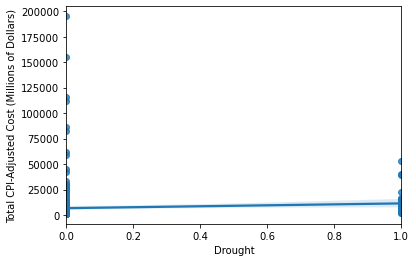

In [14]:
_ = sns.regplot(x='Drought', y='Total CPI-Adjusted Cost (Millions of Dollars)', data=df1d)

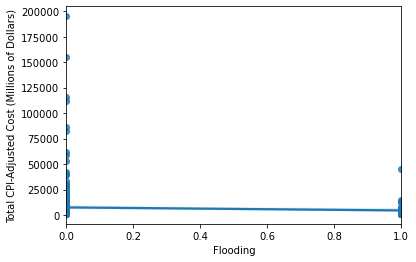

In [15]:
_ = sns.regplot(x='Flooding', y='Total CPI-Adjusted Cost (Millions of Dollars)', data=df1d)

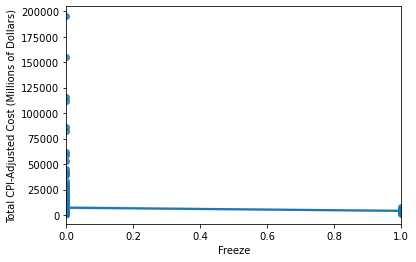

In [16]:
_ = sns.regplot(x='Freeze', y='Total CPI-Adjusted Cost (Millions of Dollars)', data=df1d)

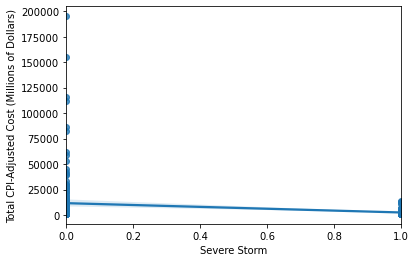

In [17]:
_ = sns.regplot(x='Severe Storm', y='Total CPI-Adjusted Cost (Millions of Dollars)', data=df1d)

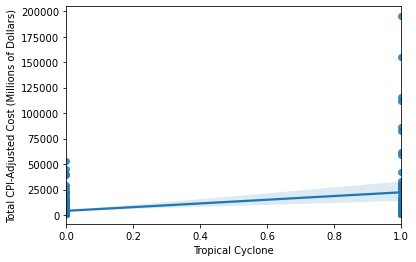

In [18]:
_ = sns.regplot(x='Tropical Cyclone', y='Total CPI-Adjusted Cost (Millions of Dollars)', data=df1d)

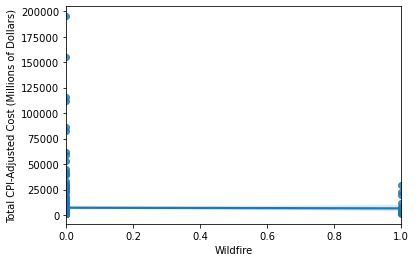

In [19]:
_ = sns.regplot(x='Wildfire', y='Total CPI-Adjusted Cost (Millions of Dollars)', data=df1d)

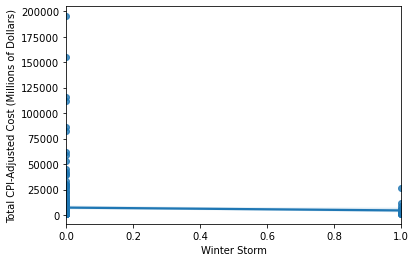

In [20]:
_ = sns.regplot(x='Winter Storm', y='Total CPI-Adjusted Cost (Millions of Dollars)', data=df1d)

# Scaling, Split into testing and training datasets

Cost vs Number of Days

In [21]:
y = df1d[['Total CPI-Adjusted Cost (Millions of Dollars)']]
X = df1d[['number_of_days']]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=80, random_state=42)

In [23]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(296, 1)
(80, 1)
(296, 1)
(80, 1)


In [24]:
rModel = linear_model.LinearRegression()


In [25]:
rModel.fit(X_train, y_train)

LinearRegression()

In [26]:
rModel.score(X_train, y_train)

0.003324896257169696

In [27]:
y_pred = rModel.predict(X_test)

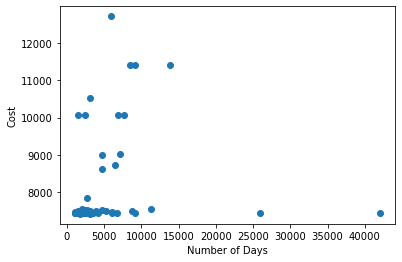

In [28]:
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Number of Days')
_ = plt.ylabel('Cost')

# Number of Days testing

In [29]:
X = df1d[['number_of_days']]
X = sm.add_constant(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [31]:
# Create the model
model2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
rModel2 = model2.fit()

In [32]:
rModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     Total CPI-Adjusted Cost (Millions of Dollars)   R-squared:                       0.003
Model:                                                       OLS   Adj. R-squared:                 -0.000
Method:                                            Least Squares   F-statistic:                    0.8617
Date:                                           Sun, 16 Jun 2024   Prob (F-statistic):              0.354
Time:                                                   13:59:17   Log-Likelihood:                -3194.0
No. Observations:                                            282   AIC:                             6392.
Df Residuals:                                                280   BIC:                             6399.
Df Model:                                                      1                                         
Covariance Type:                                       nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7608.4818   1303.536      5.837      0.000    5042.507    1.02e+04
number_of_days    14.0628     15.149      0.928      0.354     -15.758      43.883
==============================================================================
Omnibus:                      362.067   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22247.874
Skew:                           5.965   Prob(JB):                         0.00
Kurtosis:                      44.846   Cond. No.                         93.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
y_pred = rModel2.predict(X_test)

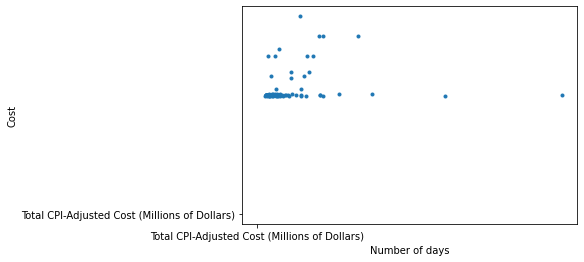

In [34]:
# Build a scatterplot
_ = plt.plot(y_test, y_pred, marker='.', linestyle='none')

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
test_range = [min(y_test), max(y_test)]
_ = plt.plot(test_range, test_range)

# Label it nicely
_ = plt.xlabel('Number of days')
_ = plt.ylabel('Cost')

# Inflation rate and year linear regression

In [35]:

y = Inflation_rate_vs_total_cost[['Inflation rate value']]
X = Inflation_rate_vs_total_cost[['year_only']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=40, random_state=42)

In [37]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(3, 1)
(40, 1)
(3, 1)
(40, 1)


In [38]:

rModel = linear_model.LinearRegression()

In [39]:

rModel.fit(X_train, y_train)

LinearRegression()

In [40]:
rModel.score(X_train, y_train)

0.9995394621644847

In [41]:
y_pred = rModel.predict(X_test)

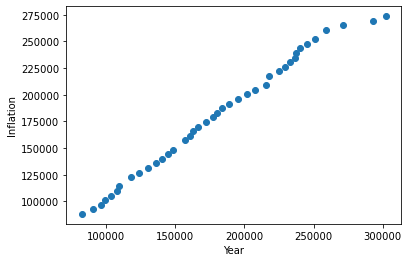

In [42]:
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Year')
_ = plt.ylabel('Inflation')

# Inflation Rate and Total cost Linear Regression 

In [43]:
X = Inflation_rate_vs_total_cost.iloc[:, [1,2]]
y = Inflation_rate_vs_total_cost.iloc[:, 0]

In [44]:
X.head()

,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars)
0,82383.333333,44434.8
1,90933.333333,3392.1
2,96533.333333,14765.9
3,99583.333333,26005.6
4,103933.333333,3124.5


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

In [46]:
X_train.head()

,Inflation rate value,Total CPI-Adjusted Cost (Millions of Dollars)
5,107600.000000,21922.7
16,160525.000000,16667.1
38,255651.666667,54126.9
22,184000.000000,37403.4
36,245121.000000,383626.4


In [47]:
scaler = StandardScaler().fit(X_train)

In [48]:
print(scaler)

StandardScaler()


In [49]:
scaler.mean_

array([180961.75260417,  69512.03125   ])

In [50]:
scaler.scale_

array([56521.95656663, 80733.52581137])

In [51]:
scaler.transform(X_train)

array([[-1.29793371, -0.58946182],
       [-0.36157192, -0.65455993],
       [ 1.32143186, -0.19056682],
       [ 0.0537534 , -0.39771125],
       [ 1.13512078,  3.89075499],
       [ 0.77777292,  0.32173708],
       [-1.43976649, -0.53888928],
       [ 0.98639981, -0.55346562],
       [ 0.25308597,  2.36520413],
       [ 0.14059281,  0.2527744 ],
       [-0.50561624, -0.43245146],
       [-0.42644347, -0.58070462],
       [-0.0693551 , -0.59722564],
       [-1.00881302, -0.37405565],
       [ 0.65663711, -0.61791592],
       [-0.01937452, -0.53326336],
       [-0.3176362 , -0.40019101],
       [-1.74407302, -0.31061732],
       [-0.88998015, -0.68532287],
       [ 0.99147306, -0.48803184],
       [ 1.97535178,  1.40889881],
       [ 1.04461465, -0.12313511],
       [-0.79252539, -0.6248709 ],
       [ 0.86027331,  1.05698182],
       [-0.15516246, -0.6736821 ],
       [ 1.59247255,  1.11920751],
       [-0.64553237, -0.06910055],
       [-1.59280437, -0.81898976],
       [ 1.24089383,

In [52]:
X_train_scaled = scaler.transform(X_train)

In [53]:
print(X_train_scaled.mean(axis=0))

[8.32667268e-17 2.77555756e-17]


In [54]:
print(X_train_scaled.std(axis=0))

[1. 1.]


In [55]:
scaler = StandardScaler().fit(X_test)

In [56]:
scaler.mean_

array([188472.15151515,  39560.37272727])

In [57]:
scaler.scale_

array([61143.73566333, 35441.47201047])

In [58]:
scaler.transform(X_test)

array([[-0.78771468,  1.08110993],
       [ 0.42674061, -0.57231462],
       [ 0.21402326, -0.42403354],
       [ 0.72745962, -0.22966238],
       [-0.65823835, -0.66149828],
       [ 0.30865002, -0.59763242],
       [-1.38262436, -1.02805755],
       [ 1.8623115 ,  1.37273721],
       [ 1.15103258,  2.20209892],
       [-0.35798955, -0.44315802],
       [-1.50365066, -0.69958925]])

In [59]:
X_test_scaled = scaler.transform(X_test)

In [60]:
print(X_test_scaled)

[[-0.78771468  1.08110993]
 [ 0.42674061 -0.57231462]
 [ 0.21402326 -0.42403354]
 [ 0.72745962 -0.22966238]
 [-0.65823835 -0.66149828]
 [ 0.30865002 -0.59763242]
 [-1.38262436 -1.02805755]
 [ 1.8623115   1.37273721]
 [ 1.15103258  2.20209892]
 [-0.35798955 -0.44315802]
 [-1.50365066 -0.69958925]]


In [61]:
rModel = linear_model.LinearRegression()

In [62]:
rModel.fit(X_train, y_train)

LinearRegression()

In [63]:
rModel.score(X_train, y_train)

0.9939898379458569

In [64]:
y_pred = rModel.predict(X_test)

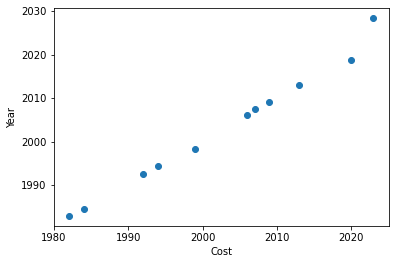

In [65]:
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Cost')
_ = plt.ylabel('Year')

# Dummies and Cost and Days Linear Regression 

In [66]:
dummy4 = pd.get_dummies(df1['Total CPI-Adjusted Cost (Millions of Dollars)'])
dummy4.head()

,1038.2,1050.6,1088.6,1100.4,1111.0,1116.0,1125.2,1125.9,1137.9,1146.2,...,45065.9,53010.4,58860.0,62000.0,82400.7,86502.7,111600.0,116272.0,155000.0,195046.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df1dummy4 = pd.concat([df1, dummy4], axis=1)
df1dummy4.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only,number_of_days,1038.2,1050.6,...,45065.9,53010.4,58860.0,62000.0,82400.7,86502.7,111600.0,116272.0,155000.0,195046.1
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data = df1dummy4[['Total CPI-Adjusted Cost (Millions of Dollars)']]
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler()
print(scaler.mean_)

StandardScaler()
[7073.26888298]


In [69]:
print(scaler.transform(data))

[[-2.48246733e-01]
 [-2.76569894e-01]
 [ 1.83618875e+00]
 [-2.85495022e-01]
 [-3.22003316e-01]
 [-2.77648818e-01]
 [-3.11118049e-01]
 [-3.12535902e-01]
 [-1.27966507e-01]
 [-1.34411805e-01]
 [ 1.19005352e-01]
 [ 1.26196294e-01]
 [-3.30640355e-01]
 [-4.37765617e-02]
 [-2.97668220e-01]
 [-3.24946349e-01]
 [-2.61962057e-01]
 [-2.02299269e-01]
 [-3.02955511e-01]
 [-1.91419650e-01]
 [-2.62204956e-01]
 [-1.61136351e-01]
 [-1.76540671e-01]
 [-3.15456339e-01]
 [-1.14279427e-01]
 [-3.36515123e-01]
 [ 2.59490375e+00]
 [-3.22302704e-01]
 [-3.17930520e-01]
 [ 8.51080533e-01]
 [ 3.13413857e-02]
 [-1.12596080e-01]
 [-3.06197931e-01]
 [-2.64193339e-01]
 [-2.90697581e-01]
 [-3.05440990e-01]
 [ 6.33080321e-02]
 [-3.16857245e-01]
 [-2.08535561e-01]
 [-1.20810584e-02]
 [ 1.61404234e-02]
 [-2.99600114e-01]
 [-2.80947726e-01]
 [-3.07022658e-01]
 [ 2.92533685e+00]
 [-1.95600900e-02]
 [-3.19404861e-01]
 [-9.65929859e-02]
 [ 2.71709779e-01]
 [-3.22071102e-01]
 [ 2.14613360e+00]
 [-2.46766744e-01]
 [-2.3531094

In [70]:
print(scaler.scale_)

[17702.82662864]


In [71]:
print(scaler.var_)

[3.13390071e+08]


In [72]:
print(scaler.n_features_in_)

1


In [73]:
print(scaler.with_std)

True


In [74]:
df1.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only,number_of_days
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5


In [75]:
df1d.head()

,Name,Disaster,Begin Date,End Date,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,year_only,number_of_days,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2678.6,7,1980,7,0,1,0,0,0,0,0
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2177.2,13,1980,4,0,0,0,0,1,0,0
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,39579.0,1260,1980,182,1,0,0,0,0,0,0
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,2019.2,0,1981,2,0,0,1,0,0,0,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1372.9,20,1981,5,0,0,0,1,0,0,0


# Cost vs Days

In [76]:
X = df1d.iloc[:, [4,7]]
y = df1d.iloc[:, 6]

In [77]:
X.head()

,Total CPI-Adjusted Cost (Millions of Dollars),number_of_days
0,2678.6,7
1,2177.2,4
2,39579.0,182
3,2019.2,2
4,1372.9,5


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

In [79]:
X_train.head()

,Total CPI-Adjusted Cost (Millions of Dollars),number_of_days
90,1284.9,3
246,1125.2,2
102,2248.8,90
162,1337.2,3
49,1371.7,2


In [80]:
scaler = StandardScaler().fit(X_train)

In [81]:
print(scaler)

StandardScaler()


In [82]:
scaler.mean_

array([6895.01702128,   33.21276596])

In [83]:
scaler.scale_

array([18023.97293099,    77.21048036])

In [84]:
scaler.transform(X_train)

array([[-3.11258624e-01, -3.91303950e-01],
       [-3.20119046e-01, -4.04255560e-01],
       [-2.57779849e-01,  7.35486087e-01],
       [-3.08356933e-01, -3.91303950e-01],
       [-3.06442816e-01, -4.04255560e-01],
       [-3.49710368e-02, -3.65400731e-01],
       [-2.10165485e-01, -3.52449121e-01],
       [-3.20080209e-01, -4.17207169e-01],
       [-2.55516197e-01, -4.30158779e-01],
       [-1.76843198e-01,  2.31558246e+00],
       [-1.79883594e-01, -4.17207169e-01],
       [ 8.85319959e-01,  4.28422712e+00],
       [ 1.26774657e-01, -3.91303950e-01],
       [-1.49929043e-01, -4.17207169e-01],
       [-2.87673369e-01, -3.91303950e-01],
       [-2.26027693e-01, -4.04255560e-01],
       [-3.02376010e-01, -4.04255560e-01],
       [-8.82667227e-02,  2.31558246e+00],
       [-3.17905328e-01, -4.30158779e-01],
       [-1.16784298e-01, -3.65400731e-01],
       [-3.08573312e-01, -4.04255560e-01],
       [-1.97609159e-03,  1.93998578e+00],
       [-2.83717527e-01, -4.04255560e-01],
       [-2.

In [85]:
X_train_scaled = scaler.transform(X_train)

In [86]:
print(X_train_scaled.mean(axis=0))

[3.77948264e-17 6.29913773e-17]


In [87]:
print(X_train_scaled.std(axis=0))

[1. 1.]


In [88]:
scaler = StandardScaler().fit(X_test)

In [89]:
scaler.mean_

array([7608.02446809,   32.18085106])

In [90]:
scaler.scale_

array([16690.96154237,    78.81677686])

In [91]:
scaler.transform(X_test)

array([[ 0.40930988,  0.73358936],
       [-0.28379578, -0.3829242 ],
       [-0.24726104, -0.33217358],
       [-0.37905692, -0.34486124],
       [-0.38334667, -0.39561185],
       [-0.3300184 , -0.39561185],
       [ 3.25876825, -0.33217358],
       [ 0.8925954 ,  2.29417081],
       [-0.36583419, -0.3829242 ],
       [-0.37491695, -0.39561185],
       [-0.18751613, -0.3829242 ],
       [-0.32478204, -0.33217358],
       [-0.26598974, -0.35754889],
       [-0.35055646, -0.39561185],
       [-0.17459896,  0.96196713],
       [-0.35336038, -0.40829951],
       [ 0.24828261,  2.29417081],
       [-0.28528162, -0.37023654],
       [-0.30390247, -0.3829242 ],
       [-0.35767409, -0.39561185],
       [ 1.97093352,  4.22269423],
       [-0.33868777, -0.3829242 ],
       [-0.38032707, -0.3829242 ],
       [ 2.72017735,  0.74627701],
       [ 0.38320594, -0.37023654],
       [-0.37969799, -0.34486124],
       [-0.2734249 , -0.39561185],
       [-0.37053734, -0.39561185],
       [-0.22179216,

In [92]:
X_test_scaled = scaler.transform(X_test)

In [93]:
print(X_test_scaled)

[[ 0.40930988  0.73358936]
 [-0.28379578 -0.3829242 ]
 [-0.24726104 -0.33217358]
 [-0.37905692 -0.34486124]
 [-0.38334667 -0.39561185]
 [-0.3300184  -0.39561185]
 [ 3.25876825 -0.33217358]
 [ 0.8925954   2.29417081]
 [-0.36583419 -0.3829242 ]
 [-0.37491695 -0.39561185]
 [-0.18751613 -0.3829242 ]
 [-0.32478204 -0.33217358]
 [-0.26598974 -0.35754889]
 [-0.35055646 -0.39561185]
 [-0.17459896  0.96196713]
 [-0.35336038 -0.40829951]
 [ 0.24828261  2.29417081]
 [-0.28528162 -0.37023654]
 [-0.30390247 -0.3829242 ]
 [-0.35767409 -0.39561185]
 [ 1.97093352  4.22269423]
 [-0.33868777 -0.3829242 ]
 [-0.38032707 -0.3829242 ]
 [ 2.72017735  0.74627701]
 [ 0.38320594 -0.37023654]
 [-0.37969799 -0.34486124]
 [-0.2734249  -0.39561185]
 [-0.37053734 -0.39561185]
 [-0.22179216  1.90085354]
 [-0.27694177 -0.37023654]
 [-0.33484137 -0.3829242 ]
 [-0.29376525  0.74627701]
 [ 1.29842583  2.29417081]
 [-0.34014963 -0.37023654]
 [-0.33333157 -0.40829951]
 [-0.38272357 -0.35754889]
 [-0.35345624 -0.33217358]
 

In [94]:
print(X_test_scaled.mean(axis=0))

[-6.49598578e-18  3.66137380e-17]


# Death vs number of days disaster lasts

In [95]:
X = df1d.iloc[:, [5,7]]
y = df1d.iloc[:, 6]
X.head()

,Deaths,number_of_days
0,7,7
1,13,4
2,1260,182
3,0,2
4,20,5


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

In [97]:
X_train.head()

,Deaths,number_of_days
90,4,3
246,0,2
102,21,90
162,0,3
49,1,2


In [98]:
scaler = StandardScaler().fit(X_train)

In [99]:
print(scaler)

StandardScaler()


In [100]:
scaler.mean_

array([37.39007092, 33.21276596])

In [101]:
scaler.scale_

array([148.0491711 ,  77.21048036])

In [102]:
scaler.transform(X_train)

array([[-2.25533657e-01, -3.91303950e-01],
       [-2.52551707e-01, -4.04255560e-01],
       [-1.10706941e-01,  7.35486087e-01],
       [-2.52551707e-01, -3.91303950e-01],
       [-2.45797195e-01, -4.04255560e-01],
       [-1.91761093e-01, -3.65400731e-01],
       [-2.52551707e-01, -3.52449121e-01],
       [-2.52551707e-01, -4.17207169e-01],
       [-2.52551707e-01, -4.30158779e-01],
       [-2.52551707e-01,  2.31558246e+00],
       [-2.52551707e-01, -4.17207169e-01],
       [ 6.66062014e-01,  4.28422712e+00],
       [-1.10706941e-01, -3.91303950e-01],
       [ 3.11378243e-02, -4.17207169e-01],
       [-2.52551707e-01, -3.91303950e-01],
       [ 4.11977368e-03, -4.04255560e-01],
       [-1.78252068e-01, -4.04255560e-01],
       [ 5.14013623e-02,  2.31558246e+00],
       [-2.52551707e-01, -4.30158779e-01],
       [-2.52551707e-01, -3.65400731e-01],
       [-2.52551707e-01, -4.04255560e-01],
       [-2.52551707e-01,  1.93998578e+00],
       [-2.52551707e-01, -4.04255560e-01],
       [-1.

In [103]:
X_train_scaled = scaler.transform(X_train)

In [104]:
print(X_train_scaled.mean(axis=0))

[-6.29913773e-18  6.29913773e-17]


In [105]:
print(X_train_scaled.std(axis=0))

[1. 1.]


In [106]:
scaler = StandardScaler().fit(X_test)

In [107]:
scaler.mean_

array([61.76595745, 32.18085106])

In [108]:
scaler.scale_

array([309.8866102 ,  78.81677686])

In [109]:
scaler.transform(X_test)

array([[-1.21870246e-01,  7.33589361e-01],
       [-1.25097233e-01, -3.82924198e-01],
       [-1.99317929e-01, -3.32173582e-01],
       [-1.92863956e-01, -3.44861236e-01],
       [-1.99317929e-01, -3.95611852e-01],
       [-1.99317929e-01, -3.95611852e-01],
       [ 1.13699790e-01, -3.32173582e-01],
       [-2.50606422e-02,  2.29417081e+00],
       [-1.89636969e-01, -3.82924198e-01],
       [-1.99317929e-01, -3.95611852e-01],
       [-1.99317929e-01, -3.82924198e-01],
       [-1.67048061e-01, -3.32173582e-01],
       [-1.12189286e-01, -3.57548890e-01],
       [-1.53796818e-02, -3.95611852e-01],
       [-3.79685893e-02,  9.61967134e-01],
       [ 8.78838958e-02, -4.08299506e-01],
       [-1.73502035e-01,  2.29417081e+00],
       [-1.47686140e-01, -3.70236544e-01],
       [-1.92863956e-01, -3.82924198e-01],
       [-1.99317929e-01, -3.95611852e-01],
       [ 1.97601447e-01,  4.22269423e+00],
       [-1.83182995e-01, -3.82924198e-01],
       [-1.99317929e-01, -3.82924198e-01],
       [ 1.

In [110]:
X_test_scaled = scaler.transform(X_test)

In [111]:
print(X_test_scaled)

[[-1.21870246e-01  7.33589361e-01]
 [-1.25097233e-01 -3.82924198e-01]
 [-1.99317929e-01 -3.32173582e-01]
 [-1.92863956e-01 -3.44861236e-01]
 [-1.99317929e-01 -3.95611852e-01]
 [-1.99317929e-01 -3.95611852e-01]
 [ 1.13699790e-01 -3.32173582e-01]
 [-2.50606422e-02  2.29417081e+00]
 [-1.89636969e-01 -3.82924198e-01]
 [-1.99317929e-01 -3.95611852e-01]
 [-1.99317929e-01 -3.82924198e-01]
 [-1.67048061e-01 -3.32173582e-01]
 [-1.12189286e-01 -3.57548890e-01]
 [-1.53796818e-02 -3.95611852e-01]
 [-3.79685893e-02  9.61967134e-01]
 [ 8.78838958e-02 -4.08299506e-01]
 [-1.73502035e-01  2.29417081e+00]
 [-1.47686140e-01 -3.70236544e-01]
 [-1.92863956e-01 -3.82924198e-01]
 [-1.99317929e-01 -3.95611852e-01]
 [ 1.97601447e-01  4.22269423e+00]
 [-1.83182995e-01 -3.82924198e-01]
 [-1.99317929e-01 -3.82924198e-01]
 [ 1.26573408e+00  7.46277015e-01]
 [ 8.36544833e-01 -3.70236544e-01]
 [-1.92863956e-01 -3.44861236e-01]
 [-1.99317929e-01 -3.95611852e-01]
 [-1.99317929e-01 -3.95611852e-01]
 [-1.60594088e-01  1

In [112]:
rModel = linear_model.LinearRegression()

In [113]:
rModel.fit(X_train, y_train)

LinearRegression()

In [114]:
rModel.score(X_train, y_train)

0.027113533876789053

In [115]:
y_pred = rModel.predict(X_test)

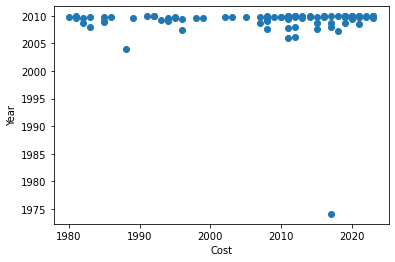

In [116]:
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('Cost')
_ = plt.ylabel('Year')